In [16]:
from ipywidgets import interact
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

In [17]:
def select(n_member:int, n_reserved:int, verbose=False) -> bool:
    """
    集団人数と観察人数から、最適な人を選べるかどうかを判定する

    Parameters
    ----------
    n_member : int
        集団人数
    n_reserved : int
        観察人数

    Returns
    -------
    bool
        最適な人を選べるかどうか
    """
    applicats = np.random.permutation(n_member)
    candidate = applicats[:n_reserved]
    best_of_group = np.max(applicats)
    best_of_candidate = np.max(candidate)
    log_df = pd.DataFrame({
        '集団': [applicats],
        '観測した集団': [candidate], 
        '最適な人': [best_of_group],
        '観測した集団の中で最も優秀な人': [best_of_candidate],
        '最適な人が観測した集団にいるか': [best_of_group in candidate],
    })
    if (verbose):
        display(log_df)

    if (np.max(applicats) in candidate):
        return False
    
    selected = np.max(candidate)
    for i in range(n_reserved, n_member):
        if (applicats[i] == best_of_group):
            return True
        if (applicats[i] > selected):
            return False

    return False    

In [18]:
@interact(n_member=(1, 100), n_reserved=(1, 10))
def select_interactive(n_member:int, n_reserved:int):
    """
    インタラクティブに表示するためのラッパー関数
    """
    is_success = select(n_member, n_reserved, verbose=True)
    if is_success:
        print('最適な人を選べました！')
    else:
        print('最適な人を選べませんでした...')

interactive(children=(IntSlider(value=50, description='n_member', min=1), IntSlider(value=5, description='n_re…

In [19]:

def simulate(n_member:int, n_trial:int) -> float:
    r_mean_prob = np.zeros(n_member)
    for i in range(1,n_member):
        for _ in range(n_trial):
            r_mean_prob[i] += select(n_member, i)

        r_mean_prob[i] /= n_trial
    
    # seabornで散布図を描画
    sns.scatterplot(x=range(n_member), y=r_mean_prob)
    plt.xlabel('観測人数')
    plt.ylabel('最適な人を選べる確率')
    plt.grid()
    plt.title(f'集団人数: {n_member}, 試行回数: {n_trial}')
    print(f'最大値: {np.max(r_mean_prob):.2f}')
    print(f'{np.argmax(r_mean_prob)}人観測すると最適な人を選べる確率が最大になります')
    print(f'{ np.argmax(r_mean_prob) / n_member * 100:.2f}%の人を観測すると最適な人を選べる確率が最大になります')

In [20]:
@interact(n_member=(10, 100), n_trial=[10, 100, 1000, 2000])
def simulate_interactive(n_member:int, n_trial:int):
    """
    インタラクティブに表示するためのラッパー関数
    """
    simulate(n_member, n_trial)

interactive(children=(IntSlider(value=55, description='n_member', min=10), Dropdown(description='n_trial', opt…

x = 0.3636363637, y = 0.36785487697473096


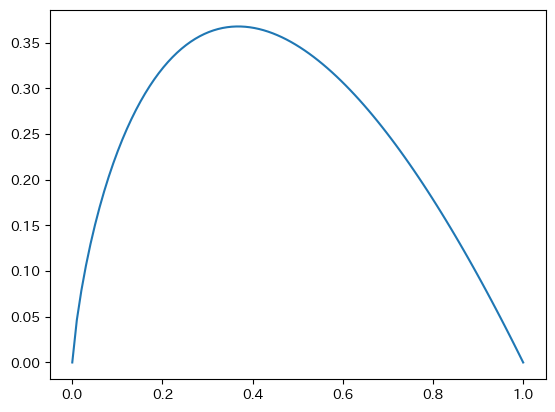

In [21]:
X = np.linspace(1e-10, 1, 100)
f = lambda x: -x*np.log(x)

sns.lineplot(x=X, y=f(X));

print(f'x = {X[np.argmax(f(X))]}, y = {np.max(f(X))}')